In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


#import warnings
#warnings.filterwarnings('ignore')


In [14]:
final_data = np.load('./data/Orb_t04.npy')

m1 = final_data[:,0]
a1 = final_data[:,1]
e1 = final_data[:,2]
i1 = final_data[:,3]

m2 = final_data[:,4]
a2 = final_data[:,5]
e2 = final_data[:,6]
i2 = final_data[:,7]

ain = a1*(a1<a2) + a2*(a1>a2)
ein = e1*(a1<a2) + e2*(a1>a2)
aout = a1*(a1>a2) + a2*(a1<a2)
eout = e1*(a1>a2) + e2*(a1<a2)

rinapo = ain*(1+ein)
routperi = aout*(1-eout)

ratio = routperi/rinapo



In [15]:
rin_range = np.linspace(0.9,1.03,100)
rout_range = np.linspace(0.9,1.2,100)

Rin,Rout = np.meshgrid(rin_range,rout_range)
Petro = Rout/Rin - 2.4*(2*1e-5)**(1./3.)


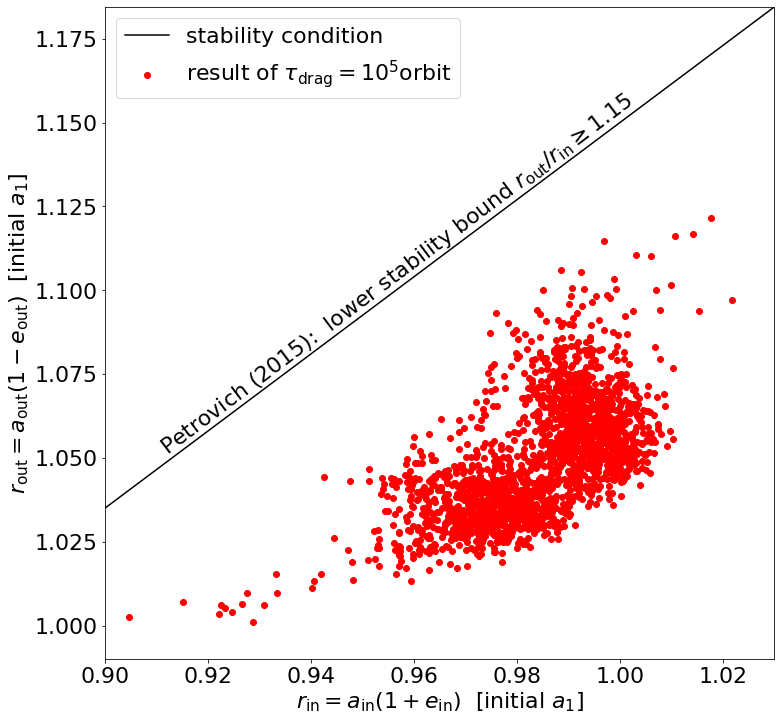

In [16]:

plt.rcParams.update({'font.size':22})

fig,axs = plt.subplots(1,1, sharex=True, figsize=(12,12))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.)

axs.set_xlim([0.9,1.03])
axs.set_ylim([0.99,1.03*1.15])

axs.set_xlabel(r'$r_{\rm in} = a_{\rm in}(1+e_{\rm in})$  [initial $a_1$]')
axs.set_ylabel(r'$r_{\rm out} = a_{\rm out}(1-e_{\rm out})$  [initial $a_1$]')


axs.scatter(rinapo,routperi,c='r',label=r'result of $\tau_{\rm drag}=10^5$orbit')
#axs.contour(Rin,Rout,Petro,[1.15],colors='k')
axs.plot(rin_range,rin_range*1.15,'k',label='stability condition')
axs.text(0.91,0.91*1.15+0.003,
         r'Petrovich (2015):  lower stability bound $r_{\rm out}/r_{\rm in}\geq1.15$',rotation=37,va='bottom')   

axs.legend()
#axs.grid()
#axs.set_axisbelow(True)

plt.savefig('./pics/pics-scatter-rin-vs-rout-tau.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-scatter-rin-vs-rout-tau.png',bbox_inches='tight',transparent=True)